# Advanced items for beginners

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos, pi

## 3d Plots

More on plots under: 

http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/scientific-python-lectures/master/Lecture-4-Matplotlib.ipynb

In [2]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [3]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)

alpha = 0.7
phi_ext = 2 * pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * cos(phi_p)*cos(phi_m) - alpha * cos(phi_ext - 2*phi_p)

Z = flux_qubit_potential(X, Y).T

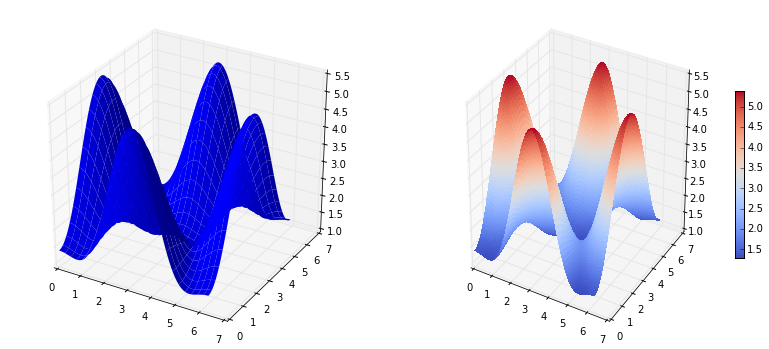

In [4]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

## Animations

In [5]:
from matplotlib import animation
# solve the ode problem of the double compound pendulum again

from scipy.integrate import odeint


g = 9.82; L = 0.5; m = 0.1

def dx(x, t):
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    return [dx1, dx2, dx3, dx4]

x0 = [np.pi/2, np.pi/2, 0, 0]  # initial state
t = np.linspace(0, 10, 250) # time coordinates
x = odeint(dx, x0, t)    # solve the ODE problem

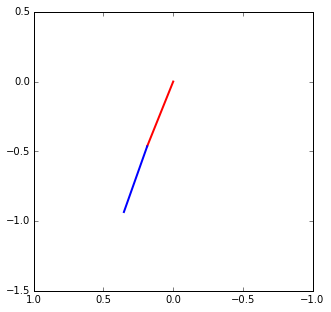

In [6]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_ylim([-1.5, 0.5])
ax.set_xlim([1, -1])

pendulum1, = ax.plot([], [], color="red", lw=2)
pendulum2, = ax.plot([], [], color="blue", lw=2)

def init():
    pendulum1.set_data([], [])
    pendulum2.set_data([], [])

def update(n): 
    # n = frame counter
    # calculate the positions of the pendulums
    x1 = + L * sin(x[n, 0])
    y1 = - L * cos(x[n, 0])
    x2 = x1 + L * sin(x[n, 1])
    y2 = y1 - L * cos(x[n, 1])
    
    # update the line data
    pendulum1.set_data([0 ,x1], [0 ,y1])
    pendulum2.set_data([x1,x2], [y1,y2])

anim = animation.FuncAnimation(fig, update, init_func=init, frames=len(t), blit=True)

anim.save('animation.mp4', fps=20);

Convert from mp4 to mov, since mov seems to be easier to show.

In [7]:
import os
os.system('del animation.wav')
os.system('ffmpeg -i animation.mp4 animation.mov')

0

In [8]:
import io
import base64
from IPython.display import HTML

video = io.open('animation.mov', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))